In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
a = open("memory_data_coref.tsv", 'r')
reader = csv.reader(a, delimiter="\t")

In [4]:
data = list(reader)

In [5]:
data

[['2313', '3.50651845', 'joshi_base'],
 ['2221', '3.343008392', 'joshi_base'],
 ['1924', '2.914180126', 'joshi_base'],
 ['1895', '2.932690699', 'joshi_base'],
 ['1718', '2.605750114', 'joshi_base'],
 ['1649', '2.460671097', 'joshi_base'],
 ['1506', '2.30333123', 'joshi_base'],
 ['1433', '2.173757222', 'joshi_base'],
 ['1297', '2.010247163', 'joshi_base'],
 ['1295', '2.149076458', 'joshi_base'],
 ['1288', '1.988651495', 'joshi_base'],
 ['1281', '2.010247163', 'joshi_base'],
 ['1145', '1.664716475', 'joshi_base'],
 ['1144', '1.738758765', 'joshi_base'],
 ['1125', '1.66780157', 'joshi_base'],
 ['1120', '1.572163612', 'joshi_base'],
 ['1102', '1.66780157', 'joshi_base'],
 ['1092', '1.738758765', 'joshi_base'],
 ['1092', '1.680141952', 'joshi_base'],
 ['1079', '1.652376093', 'joshi_base'],
 ['1077', '1.754184242', 'joshi_base'],
 ['1066', '1.535142466', 'joshi_base'],
 ['1040', '1.581418898', 'joshi_base'],
 ['1019', '1.584503993', 'joshi_base'],
 ['1019', '1.476525653', 'joshi_base'],
 ['1

In [19]:
def map_color(label):
    if label=="joshi_base":
        return 'b'
    elif label == "joshi_large":
        return 'g'
    elif label == "incr_small":
        return 'y'
    elif label == "incr_large":
        return 'tab:orange'
    else:
        return 'k'
    
def map_marker(label):
    if label=="joshi_base":
        return '1'
    elif label == "joshi_large":
        return '2'
    elif label == "incr_small":
        return '.'
    elif label == "incr_large":
        return '_'
    else:
        return '*'
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

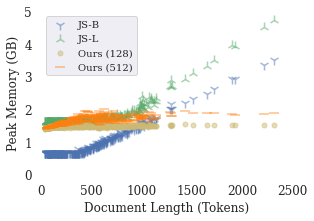

In [22]:
models = ["joshi_base", "joshi_large", "incr_small", "incr_large"]
real_name = {"joshi_base": "JS-B",
             "joshi_large": "JS-L",
             "incr_small": "Ours (128)",
             "incr_large": "Ours (512)",           
            }
fig, ax = plt.subplots()
fig.set_size_inches(4.5,3)
for model in models:
    model_data = [d for d in data if d[2] == model]
    for i, d in enumerate(model_data):
        plt.scatter(int(d[0]), float(d[1]), 
                    color=map_color(model), 
                    alpha=0.5,
                    marker=map_marker(model),
                    s = 100,
                    label=real_name[model] if i==0 else "")
plt.xlim(0, 2500);
plt.ylim(0, 5);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
ax.set_facecolor('white')
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Document Length (Tokens)', fontsize=12)
plt.ylabel('Peak Memory (GB)', fontsize=12)
plt.savefig('memory.svg')